## PROBLEM STATEMENT

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.

* How well those variables describe the bike demands

## STEP1 : Importing the required Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option("display.max_columns",800)
pd.set_option("display.max_rows",300)

import warnings
warnings.filterwarnings('ignore')

## STEP2 : Read data and explore data

In [6]:
# read the data set 
df = pd.read_csv('.\Bikesharing Assignment\day.csv',header=0, low_memory=False)

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# checking the shape 
df.shape

(730, 16)

In [9]:
# describing the columns 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# getting info about data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## STEP3: Understanding if there are any gaps in data

In [12]:
#checking for missing values
df.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* From the above we understand that there are no nulls in the data 

In [14]:
# checking for duplicates 
duplicates = df.duplicated()

if duplicates.any():
    print("There are duplicates in the dataset.")
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


## STEP4: Dropping the unwanted columns 

* instant: we can drop this column as this is only index
* dteday: As we already have other features like yr month and weekday, we don't need this column
* we can drop 
casual and registered as heye are in c (cnt is sum of both of them)es

In [17]:
# Dropping the columns mentioned above
df.drop(columns=['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# checking the updated data
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## STEP5: Checking for outliers

In [19]:
# checking for unique values 

df.nunique()


season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

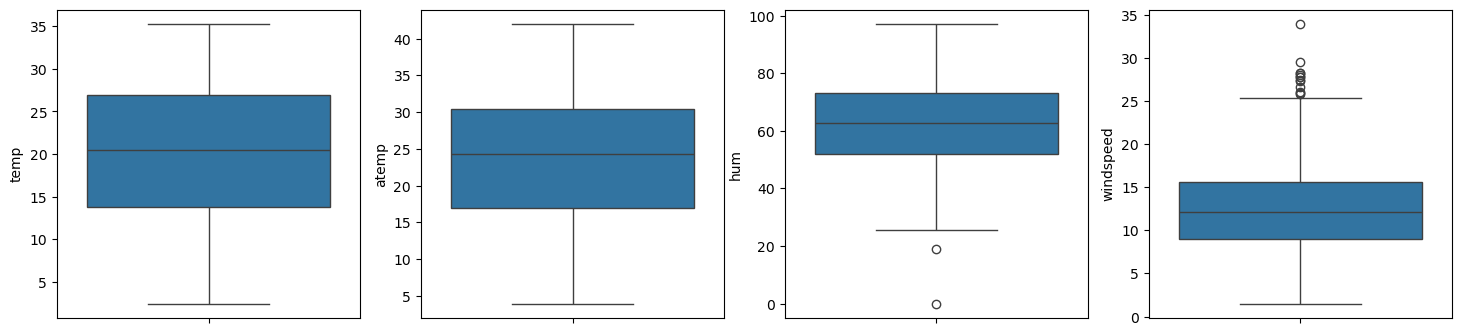

In [20]:
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

* From the above we can state that there are no outliers

## STEP6: Encoding the data 

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
#  mapping the categorical data to their respective names 

# Mapping the season with their respective season names:

df['season'] = df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Mapping the Month with their respective Month names:

df['mnth'] = df['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Weekday is not following the factual data as per dates, hence assuming as below

df['weekday'] = df['weekday'].replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})

# Mapping the weathersit with their whether situations

df['weathersit'] = df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_snow_rain', 4: 'Heavy_snow_rain'})

In [25]:
# checking the data after maapping 

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## STEP7: VISUALISING THE DATA

### Drawing pairplots to check the linear relationships

### visualising the whole data

<Figure size 2000x1500 with 0 Axes>

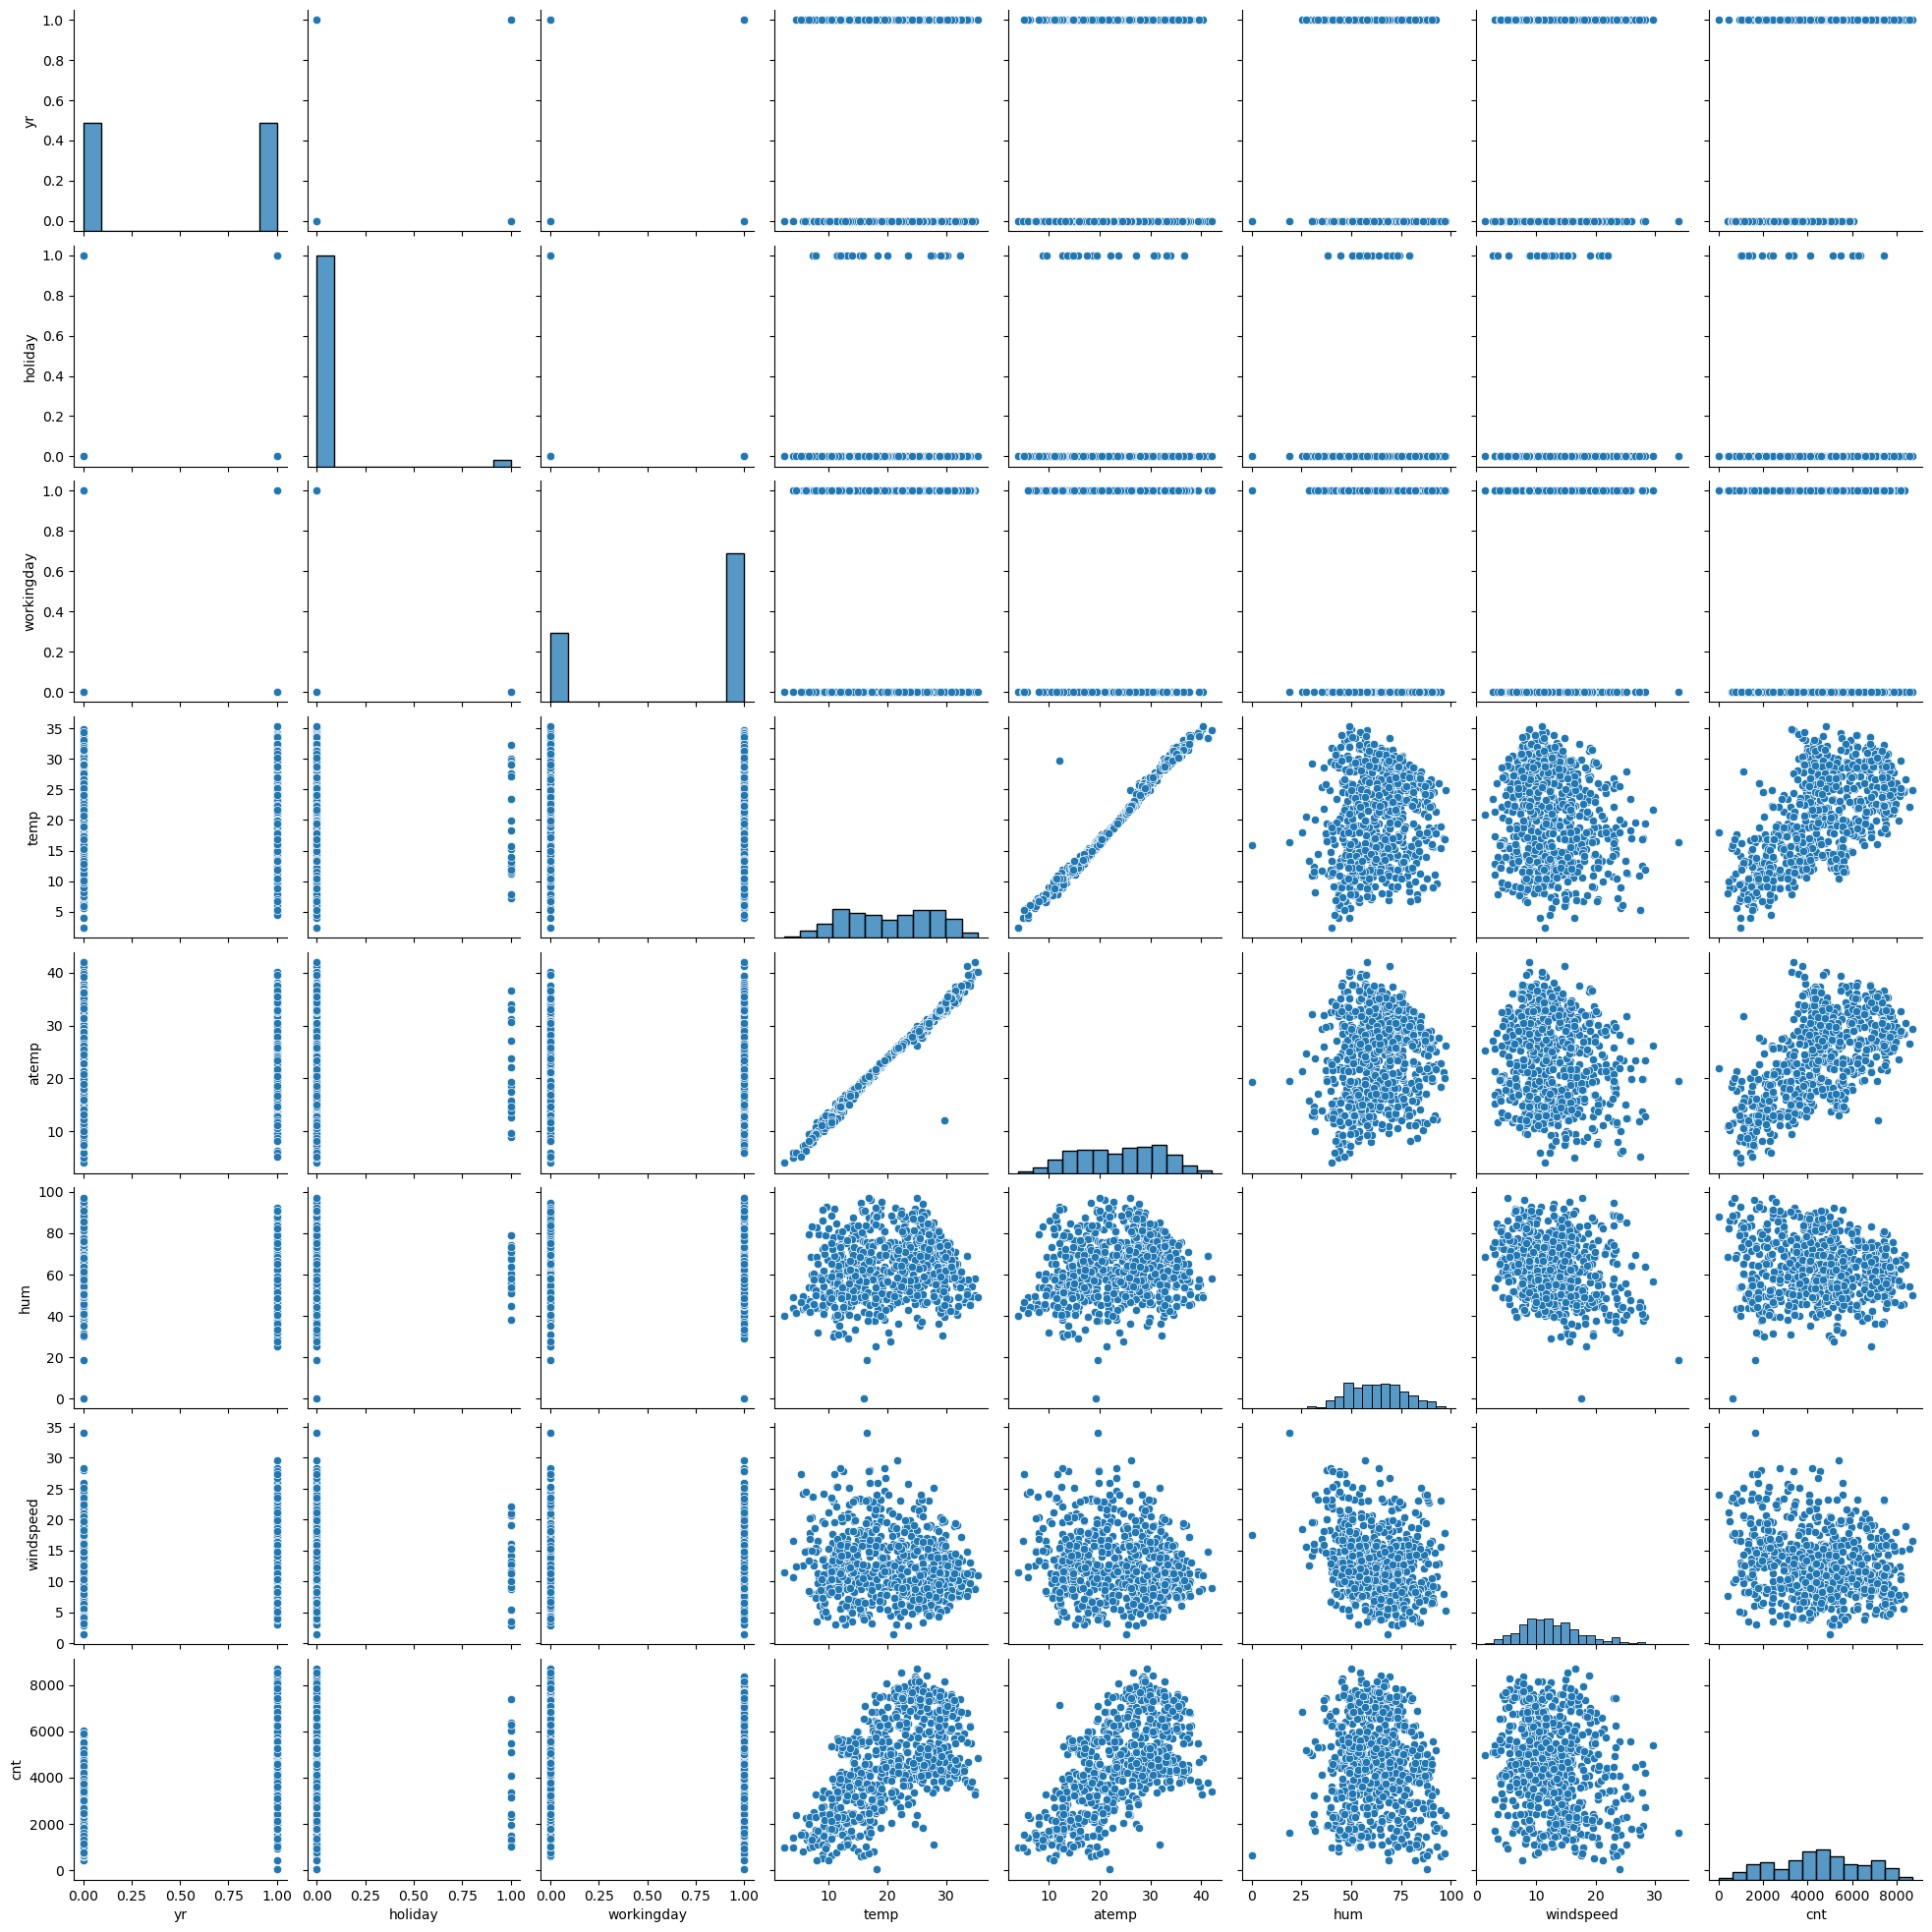

In [29]:
plt.figure(figsize=(20, 15))  # Set the figure size
sns.pairplot(df)
plt.show()

* As it is difficult for the analysis of plots let's break it down

### Let's visualize the numeric variables 

<Figure size 1500x3000 with 0 Axes>

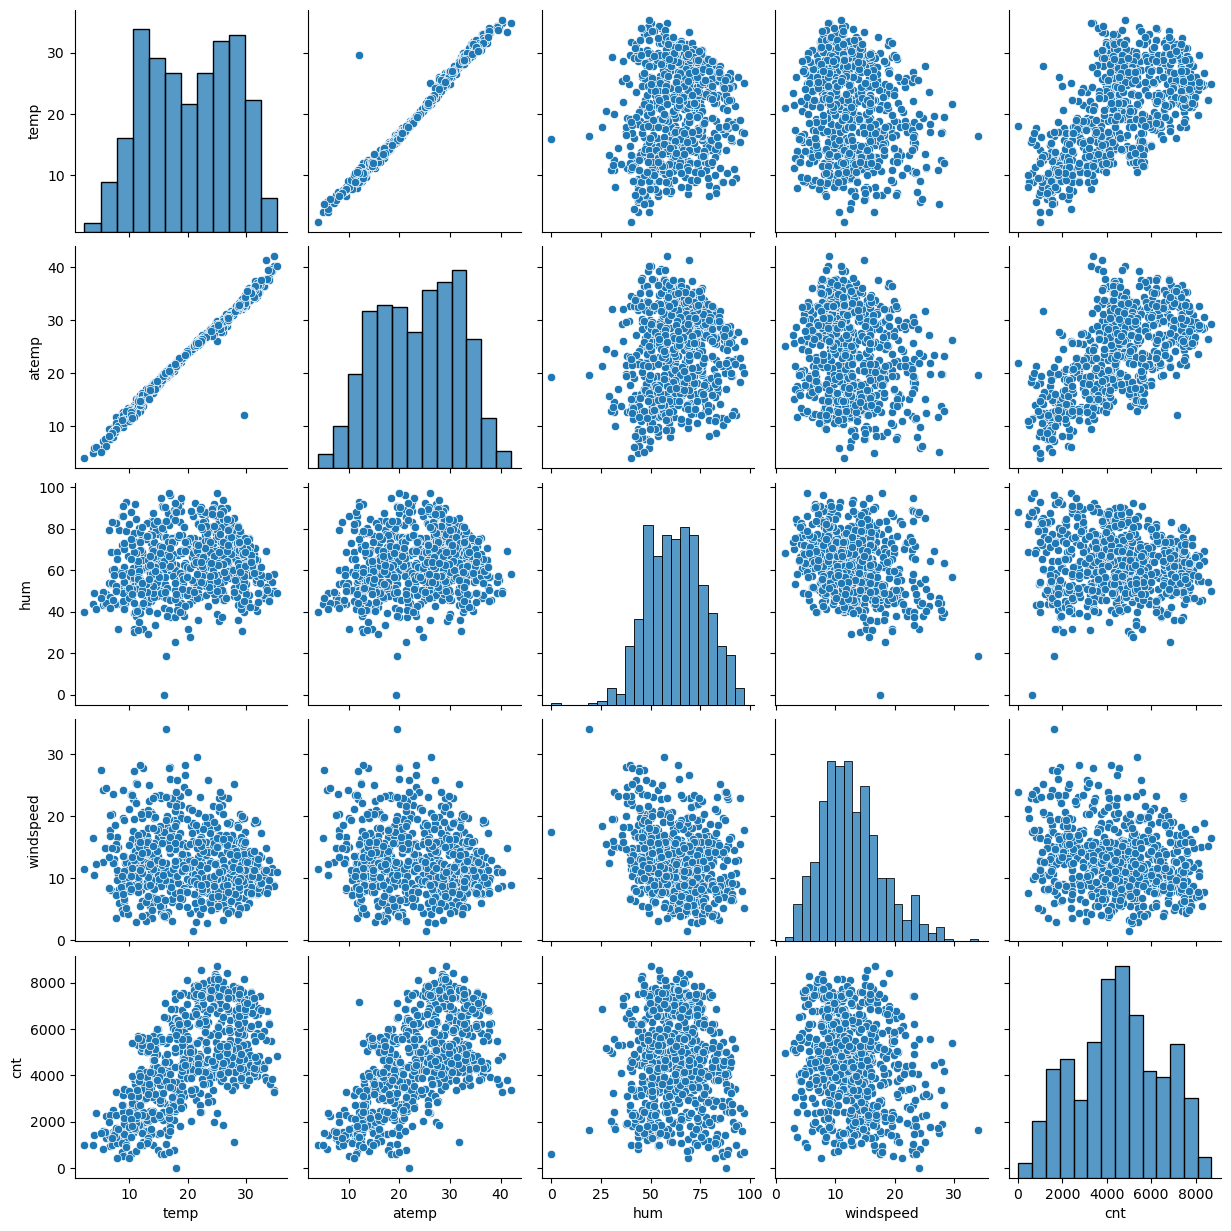

In [32]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['temp', 'atemp', 'hum','windspeed','cnt'])
plt.show()

* From the above pairplot we can say that temp and atemp are the strongest predictors of bike rentals. Humidity and wind speed also seem to have some influence, but to a lesser extent. 

### visualising the categorical data

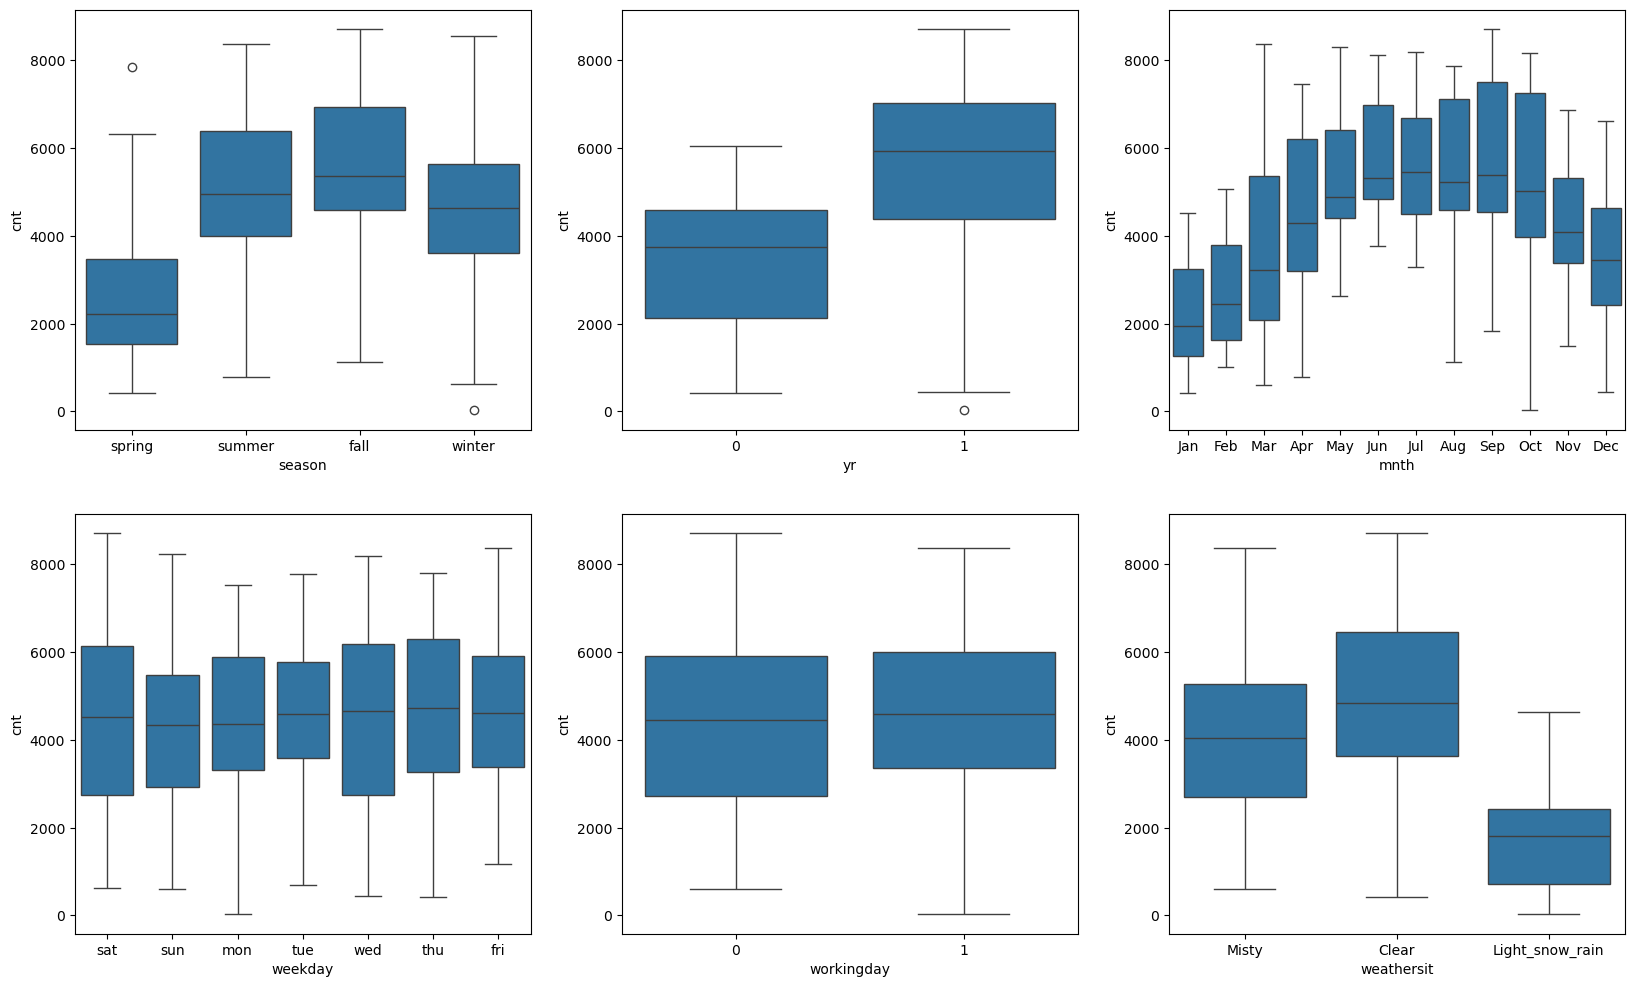

In [35]:

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

* Bike rentals are higher in warmer seasonscompared to colder seasons.

* Rentals are lower on weekends compared to weekdays.

* Rentals are higher on working days compared to non-working days.

* Clear weather is associated with higher bike rentals.

### using heatmap to understand the correlation b/w numeric variables 


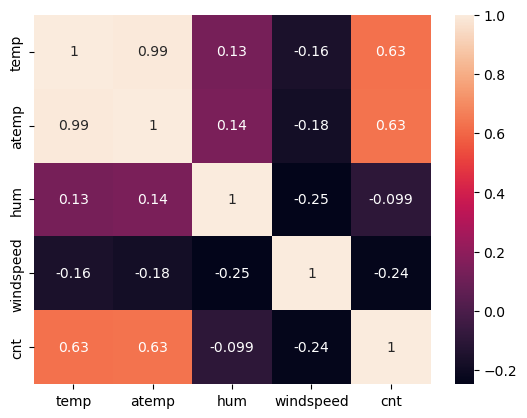

In [38]:
num_variables = ["temp","atemp","hum","windspeed","cnt"]
sns.heatmap(df[num_variables].corr(),annot= True)
plt.show()

* There is a very strong positive correlation between temperature and atemp.
  
* There is a strong positive correlation between temperature and cnt. This suggests that as the temperature increases, the number of bike rentals also increases. 

* There is also a strong positive correlation between atemp and cnt

* This supports the idea that people are more likely to bike when the weather feels warmer.

* There is a negative correlation between humidity and cnt. This suggests that as humidity increases, the number of bike rentals tends to decrease slightly. 

* There is a negative correlation between windspeed and cnt. This suggests that as windspeed increases, the number of bike rentals tends to decrease slightly. 

### Checking the relationship of cnt with other numerics

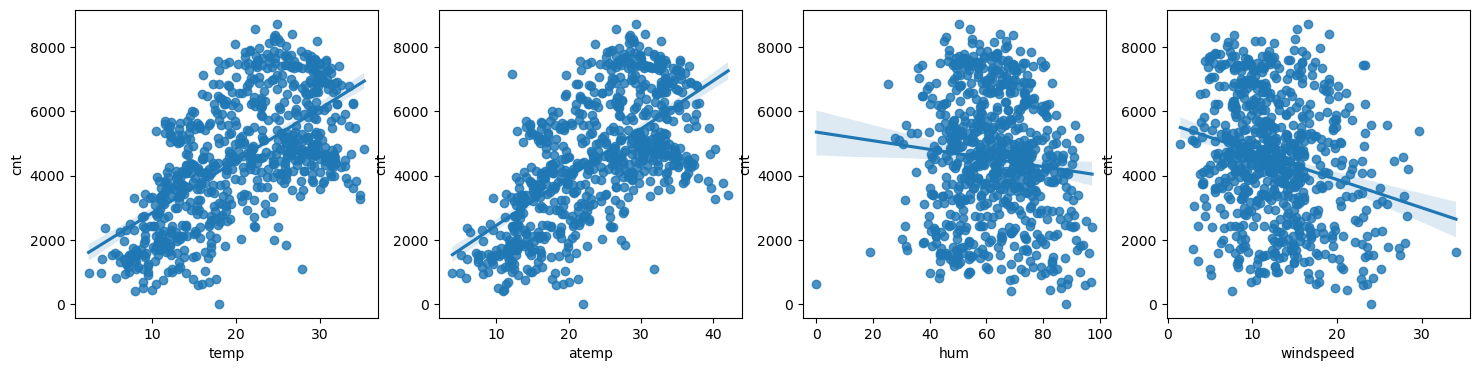

In [41]:
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.regplot(x=col, y='cnt', data=df)
    i+=1

* Temp and atemp are the strongest predictors of bike rental count.

* Humidity and windspeed have a weaker negative impact on bike rentals.

## STEP8: Creating dummies and Modifidifying the original data set 

### creating dummies

In [45]:
df_dummies = pd.get_dummies(df[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True, dtype=int)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### concat dummy with original data set

In [47]:
df = pd.concat([df,df_dummies],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Misty
0,spring,0,Jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
# rechecking the shape

df.shape

(730, 34)

In [49]:
# dropping the columns for which we have already created dummies 

df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)

# rechecking the data 

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
# rechecking the shape 

df.shape

(730, 30)

## STEP9: Splitting data set into Train and Test Sets

In [52]:
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)


(510, 30)
(220, 30)


## STEP10: Rescalling the features

* Here we will be using minmax scaler 

In [55]:
## instantiate an object

scaler = MinMaxScaler()

## create a list of numeric varaibles

num_vars = ['temp','atemp','hum','windspeed','cnt']

## Fit on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


## STEP11: Training the data

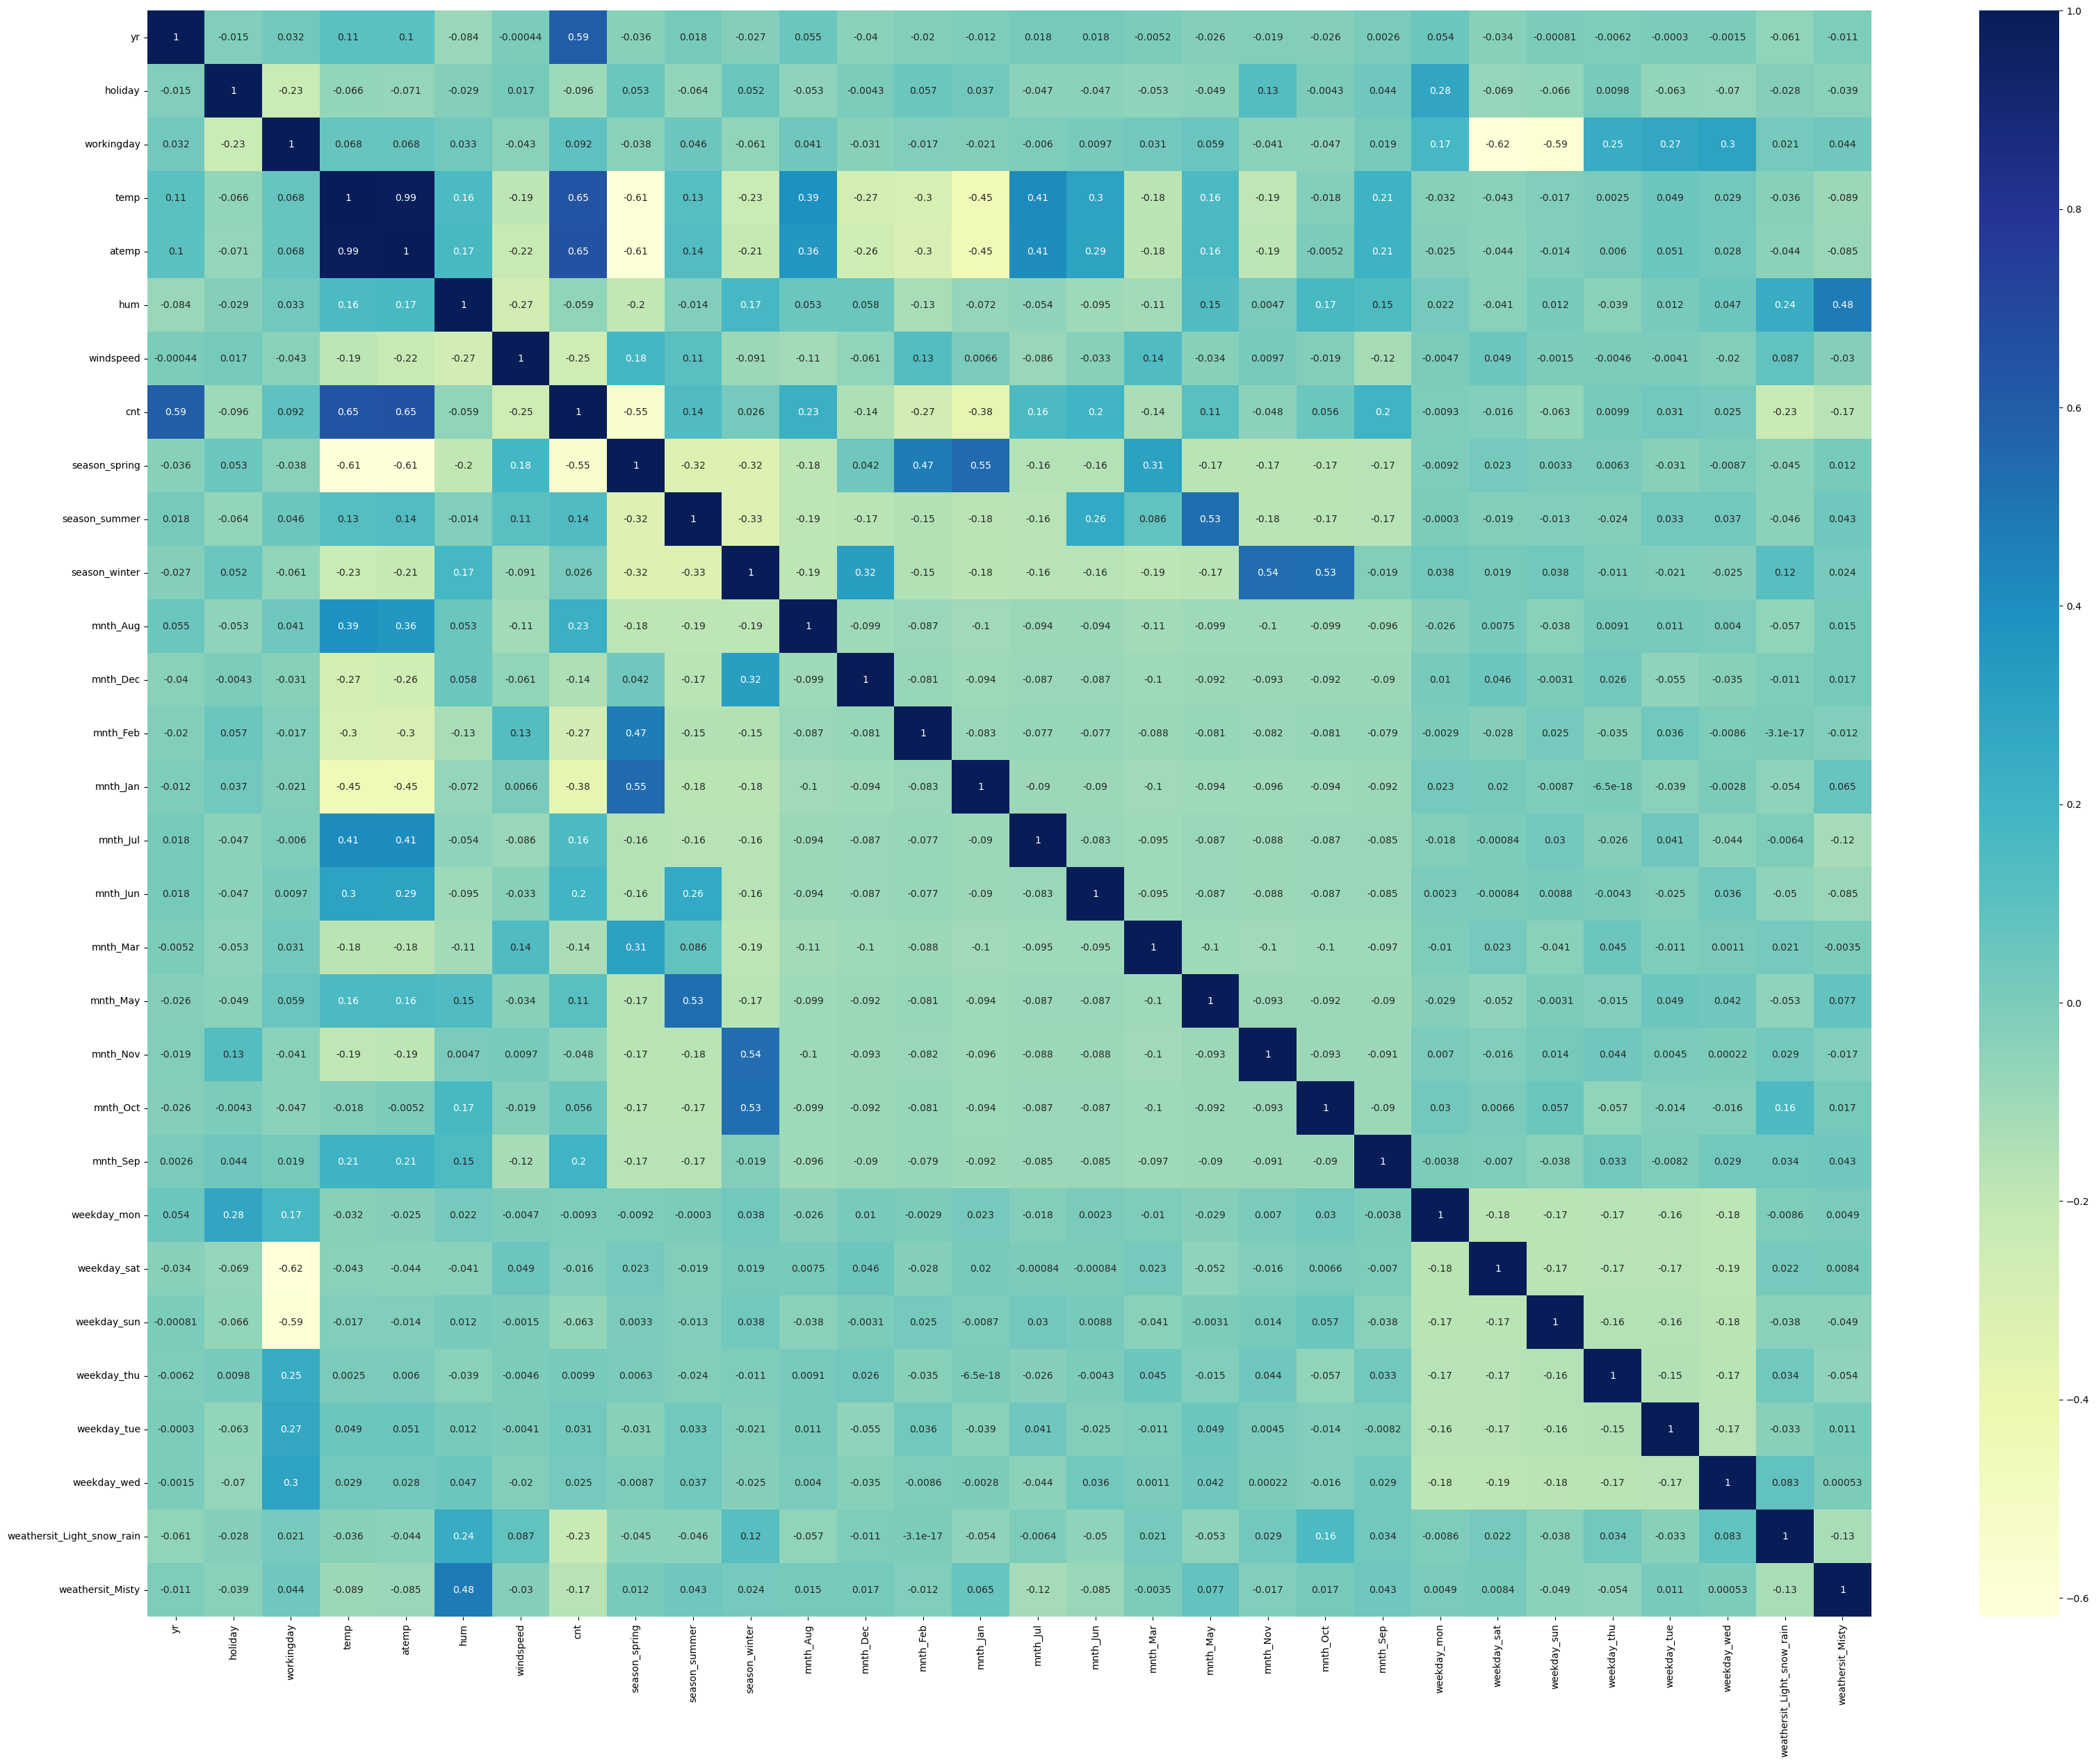

In [58]:
# heatmap

plt.figure(figsize=(40,30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [59]:
# Assuming 'cnt' is the target variable
y_train = df_train.pop('cnt')
X_train = df_train

In [60]:
# Selecting top 15 features inorder to minimalise the manual analysis 

lr = LinearRegression()

# Apply RFE for feature selection (top 15 features)
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

# Get the selected feature names
X_train_selected = X_train.columns[rfe.support_]

In [61]:
X_train_selected

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snow_rain',
       'weathersit_Misty'],
      dtype='object')

In [62]:
X_train_new = X_train[X_train_selected]

In [63]:
X_train_new.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,weekday_sat,weekday_sun,weathersit_Light_snow_rain,weathersit_Misty
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [64]:
X_train_new.shape

(510, 15)

## STEP12: Creating the models

### Model 1

In [67]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.11e-191
Time:                        23:27:02   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1995      0.028      7.200      0.000       0.145       0.254
yr                             0.2298      0.008     28.647      0.000       0.214       0.246
holiday                       -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                     0.0837      0.010      8.665      0.000       0.065       0.103
temp                           0.5277      0.033     15.884      0.000       0.462       0.593
hum                           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring                 -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                  0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                  0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                      -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                       0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat                    0.0937      0.012      8.040      0.000       0.071       0.117
weekday_sun                    0.0406      0.012      3.315      0.001       0.017       0.065
weathersit_Light_snow_rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Misty              -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.68
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_Misty,1.57


### Model 2

In [70]:
X = X_train_new.drop('holiday', axis=1)

In [71]:
# add_constant
X_train_sm = sm.add_constant(X)

# create first model

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.11e-191
Time:                        23:27:02   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1811      0.042      4.301      0.000       0.098       0.264
yr                             0.2298      0.008     28.647      0.000       0.214       0.246
workingday                     0.1021      0.025      4.024      0.000       0.052       0.152
temp                           0.5277      0.033     15.884      0.000       0.462       0.593
hum                           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring                 -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                  0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                  0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                      -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                       0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat                    0.1121      0.027      4.181      0.000       0.059       0.165
weekday_sun                    0.0591      0.027      2.192      0.029       0.006       0.112
weathersit_Light_snow_rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Misty              -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_sat,4.91
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.69
6,season_summer,3.04
13,weathersit_Misty,2.31


### MODEL 3

In [74]:
X = X.drop('hum', axis=1)

In [75]:
# add_constant
X_train_sm = sm.add_constant(X)

# create first model

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.28e-188
Time:                        23:27:03   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1008      0.038      2.624      0.009       0.025       0.176
yr                             0.2337      0.008     28.828      0.000       0.218       0.250
workingday                     0.1029      0.026      3.983      0.000       0.052       0.154
temp                           0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                     -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_spring                 -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer                  0.0477      0.015      3.180      0.002       0.018       0.077
season_winter                  0.0846      0.017      4.971      0.000       0.051       0.118
mnth_Jul                      -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_Sep                       0.0759      0.017      4.537      0.000       0.043       0.109
weekday_sat                    0.1146      0.027      4.201      0.000       0.061       0.168
weekday_sun                    0.0567      0.027      2.069      0.039       0.003       0.111
weathersit_Light_snow_rain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_Misty              -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,weekday_sat,4.45
10,weekday_sun,4.21
4,season_spring,3.82
6,season_winter,2.78
5,season_summer,2.76
0,yr,2.07
7,mnth_Jul,1.60


### MODEL 4 

In [78]:
X = X.drop('workingday', axis=1)

In [79]:
# add_constant
X_train_sm = sm.add_constant(X)

# create first model

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.06e-186
Time:                        23:27:03   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2003      0.030      6.760      0.000       0.142       0.259
yr                             0.2342      0.008     28.467      0.000       0.218       0.250
temp                           0.4928      0.033     14.847      0.000       0.428       0.558
windspeed                     -0.1513      0.025     -6.025      0.000      -0.201      -0.102
season_spring                 -0.0681      0.021     -3.225      0.001      -0.110      -0.027
season_summer                  0.0481      0.015      3.159      0.002       0.018       0.078
season_winter                  0.0816      0.017      4.731      0.000       0.048       0.116
mnth_Jul                      -0.0488      0.019     -2.618      0.009      -0.085      -0.012
mnth_Sep                       0.0723      0.017      4.264      0.000       0.039       0.106
weekday_sat                    0.0157      0.011      1.370      0.171      -0.007       0.038
weekday_sun                   -0.0421      0.012     -3.548      0.000      -0.065      -0.019
weathersit_Light_snow_rain    -0.2848      0.025    -11.530      0.000      -0.333      -0.236
weathersit_Misty              -0.0802      0.009     -9.170      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,season_summer,2.24
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_Jul,1.59
11,weathersit_Misty,1.55
7,mnth_Sep,1.33
8,weekday_sat,1.22


### MODEL 5 

In [82]:
X = X.drop('weekday_sat', axis=1)

In [83]:
# add_constant
X_train_sm = sm.add_constant(X)

# create first model

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.37e-187
Time:                        23:27:03   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2034      0.030      6.877      0.000       0.145       0.261
yr                             0.2339      0.008     28.414      0.000       0.218       0.250
temp                           0.4917      0.033     14.805      0.000       0.426       0.557
windspeed                     -0.1497      0.025     -5.963      0.000      -0.199      -0.100
season_spring                 -0.0682      0.021     -3.227      0.001      -0.110      -0.027
season_summer                  0.0479      0.015      3.145      0.002       0.018       0.078
season_winter                  0.0818      0.017      4.739      0.000       0.048       0.116
mnth_Jul                      -0.0483      0.019     -2.587      0.010      -0.085      -0.012
mnth_Sep                       0.0723      0.017      4.260      0.000       0.039       0.106
weekday_sun                   -0.0450      0.012     -3.847      0.000      -0.068      -0.022
weathersit_Light_snow_rain    -0.2847      0.025    -11.513      0.000      -0.333      -0.236
weathersit_Misty              -0.0802      0.009     -9.161      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_Jul,1.59
10,weathersit_Misty,1.55
7,mnth_Sep,1.33
8,weekday_sun,1.17


### Model 6 

In [86]:
# Dropping the Jul as it is comparitively having high P value 

X = X.drop('mnth_Jul', axis=1)

In [87]:
# add_constant
X_train_sm = sm.add_constant(X)

# create first model

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          5.70e-187
Time:                        23:27:04   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1956      0.030      6.611      0.000       0.137       0.254
yr                             0.2344      0.008     28.324      0.000       0.218       0.251
temp                           0.4795      0.033     14.503      0.000       0.415       0.544
windspeed                     -0.1498      0.025     -5.935      0.000      -0.199      -0.100
season_spring                 -0.0572      0.021     -2.749      0.006      -0.098      -0.016
season_summer                  0.0623      0.014      4.377      0.000       0.034       0.090
season_winter                  0.0937      0.017      5.599      0.000       0.061       0.127
mnth_Sep                       0.0854      0.016      5.244      0.000       0.053       0.117
weekday_sun                   -0.0461      0.012     -3.925      0.000      -0.069      -0.023
weathersit_Light_snow_rain    -0.2856      0.025    -11.487      0.000      -0.334      -0.237
weathersit_Misty              -0.0790      0.009     -8.981      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       79.321   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.654
Skew:                          -0.775   Prob(JB):                     4.91e-46
Kurtosis:                       5.724   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.91
5,season_winter,1.64
9,weathersit_Misty,1.55
6,mnth_Sep,1.22
7,weekday_sun,1.17
8,weathersit_Light_snow_rain,1.08


## STEP13: Residual Analysis

<Axes: ylabel='Density'>

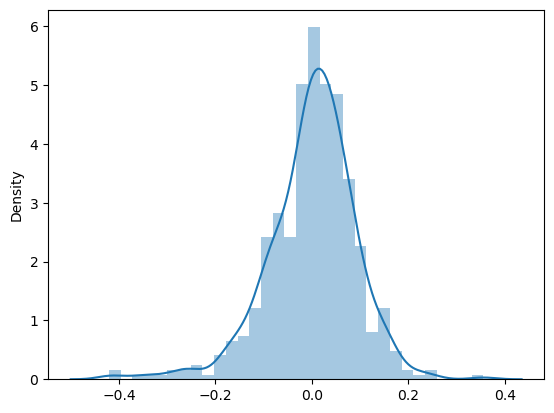

In [90]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)


### qq plot

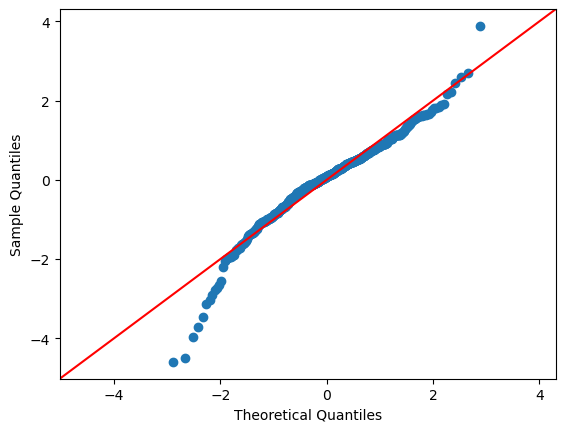

In [92]:
sm.qqplot(res, fit=True, line= '45')
plt.show()

## STEP14: Prediction and Evaluation 

In [94]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [95]:
y_test = df_test.pop('cnt')
X_test = df_test

In [96]:
# add constant

X_test_sm = sm.add_constant(X_test[X.columns])
X_test_sm.head()

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_Sep,weekday_sun,weathersit_Light_snow_rain,weathersit_Misty
184,1.0,0,0.831783,0.084219,0,0,0,0,0,0,1
535,1.0,1,0.901354,0.153728,0,1,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0,0


In [97]:
X_test_sm.shape

(220, 11)

In [98]:
y_test_pred = lr_model.predict(X_test_sm )

In [99]:
r2_score(y_true=y_test, y_pred=y_test_pred)


0.8031908103816628

In [100]:
lr_model.params

const                         0.195618
yr                            0.234391
temp                          0.479457
windspeed                    -0.149843
season_spring                -0.057246
season_summer                 0.062339
season_winter                 0.093716
mnth_Sep                      0.085435
weekday_sun                  -0.046099
weathersit_Light_snow_rain   -0.285587
weathersit_Misty             -0.078980
dtype: float64

##### 0.195618 + 0.234391 X yr + 0.4794 X temp -0.1498 X windspeed -0.0572 X  season_spring +0.0623 X season_summer + 0.0937 X season_winter + 0.0854 X mnth_Sep - 0.0460 X weekday_sun -0.2855 X  weathersit_Light_snow_rain -0.0789 X weathersit_Misty               

Text(0, 0.5, 'y_pred')

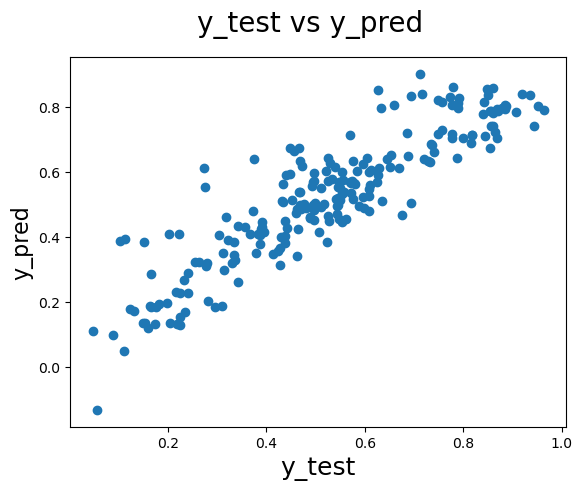

In [102]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize =20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

## Model summary and Recommendation

Upon checking the final Model i.e., Model 6. Because:

* Model 6 have lesser predictors making it easier to interpret how each variable affect the demand for bikes

* It is also simpler. Simpler model is always prefferable.

* Variables to predict the demand for bikes are :

        1) temperature 
        2) Year 
        3) season_spring  
        4) season_summer 
        5) season_winter
        6) weathersit_Misty
        7) windspeed
        8) mnth_Sep
        9) weekday_sun
        10) weathersit_Light_snow_rain   
  
        

r2_score for Train model is 83.3

r2_score for Test model is 80.3